# Лабораторная работа №4
-------------
## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
------------
<b>Цель лабораторной работы:</b> изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

## Задание:
1.     Выберите набор данных (датасет) для решения задачи классификации или регресии.
2.    В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3.    С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4.    Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
5.    Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
6.    Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
7.    Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
8.    Постройте кривые обучения и валидации.

## Загрузка библиотек и данных, их подготовка

In [500]:
# Загрузка необходимых для работы библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve,confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Загрузка датасета
data = pd.read_csv('data/laba_4/results.csv', sep = ',')
data.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [ ]:
# Проанализируем пропуски в данных
print(data.shape)
data.isnull().sum()

(4560, 6)


home_team     0
away_team     0
home_goals    0
away_goals    0
result        0
season        0
dtype: int64

In [ ]:
# Поскольку в датасете есть категориальные признаки, необходимо из закодировать
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    dt = str(data[i].dtype)
    if dt == 'object':
        data[i] = le.fit_transform(data[i])
data.head()        

,home_team,away_team,home_goals,away_goals,result,season
0,28,19,1.0,1.0,1,0
1,1,2,1.0,1.0,1,0
2,14,34,2.0,1.0,2,0
3,23,37,2.0,1.0,2,0
4,25,4,3.0,0.0,2,0


## Метод k-ближайших соседей

In [ ]:
# Разделим датасет на обучающую и тестовую выборки
X = data.drop('result',axis=1).values
y = data['result'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=14, stratify=y)
print('X_train: {}  y_train: {}'.format(X_train.shape, y_train.shape))
print('X_test: {}  y_test: {}'.format(X_test.shape, y_test.shape))

X_train: (3556, 5)  y_train: (3556,)
X_test: (1004, 5)  y_test: (1004,)


In [ ]:
# Setup arrays to store training and test accuracies
neighbors = np.arange(1,6)
len(neighbors)

5

In [ ]:
# Вернуть новый массив заданной формы и типа без инициализации записей.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Настройка классификатора Knn с K соседями
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Обучить модель
    knn.fit(X_train, y_train)
    
    # Вычислить точность на тренировочном наборе
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Вычислить точность на тестовом наборе
    test_accuracy[i] = knn.score(X_test, y_test)

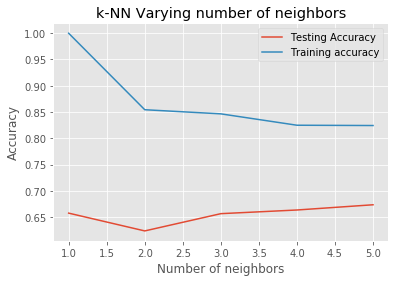

In [ ]:
# Построить набор
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Изучение работы KNeighborsClassifier

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.6733067729083665

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       284
           1       0.42      0.39      0.40       256
           2       0.78      0.78      0.78       464

   micro avg       0.67      0.67      0.67      1004
   macro avg       0.64      0.64      0.64      1004
weighted avg       0.67      0.67      0.67      1004



In [ ]:
#Точность
cl1_1 = KNeighborsClassifier(n_neighbors=5)
cl1_1.fit(X_train, y_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_test, target1_1)

0.6733067729083665

In [ ]:
#Матрица неточностей
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,213,54,17,284
1,72,100,84,256
2,16,85,363,464
All,301,239,464,1004


## ROC-кривая
ROC-кривая (англ. receiver operating characteristic) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долями объектов от общего количества носителей признака, верно классифицированных как несущих признак, (true positive rate, называемой чувствительностью алгоритма классификации) и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущих признак (false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

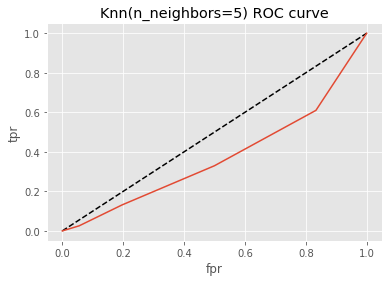

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=2)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

## Кросс-валидация

In [ ]:
param_grid = {'n_neighbors':np.arange(1,6)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.6633858267716536
{'n_neighbors': 1}


### K-fold
Каждой стратегии в scikit-learn ставится в соответствии специальный класс-итератор, который может быть указан в качестве параметра cv функций cross_val_score и cross_validate.

In [ ]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         X, y, 
                         cv=KFold(n_splits=5))

# Значение метрики accuracy для 5 фолдов
print(scores)
# Усредненное значение метрики accuracy для 5 фолдов
np.mean(scores)

[0.56359649 0.62171053 0.67324561 0.67653509 0.63815789]


0.6346491228070176

In [ ]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

scores = cross_validate(KNeighborsClassifier(n_neighbors=5), 
                        X, y, scoring=scoring, 
                        cv=KFold(n_splits=5), return_train_score=True)
scores

{'fit_time': array([0.00299978, 0.00198722, 0.00300074, 0.00199962, 0.00100279]),
 'score_time': array([0.09993982, 0.09394884, 0.08494759, 0.08096099, 0.08796382]),
 'test_precision': array([0.56391499, 0.6282815 , 0.6683737 , 0.68801737, 0.6461795 ]),
 'train_precision': array([0.8261761 , 0.82556029, 0.82902441, 0.81634887, 0.82036362]),
 'test_recall': array([0.56359649, 0.62171053, 0.67324561, 0.67653509, 0.63815789]),
 'train_recall': array([0.82428728, 0.82510965, 0.82867325, 0.81770833, 0.82099781]),
 'test_f1': array([0.56374257, 0.62117049, 0.67064523, 0.6806793 , 0.63751139]),
 'train_f1': array([0.82479334, 0.82435577, 0.828212  , 0.81629983, 0.81987511])}

### Leave One Out
В тестовую выборку помещается единственный элемент (One Out). Количество фолдов в этом случае определяется автоматически и равняется количеству элементов.

Данный метод более ресурсоемкий чем KFold.

In [ ]:
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
   y_train, y_test = y[train_index], y[test_index]

### Repeated K-Fold

In [ ]:
scores2 = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         X, y, 
                         cv=RepeatedKFold(n_splits=5, n_repeats=2))
scores2

array([0.67763158, 0.67324561, 0.70394737, 0.70175439, 0.67105263,
       0.69736842, 0.6622807 , 0.6502193 , 0.68859649, 0.65570175])

## Обучение с оптимальным K

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=14, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6733067729083665

## Построение кривых обучения

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\fulcrum\\desktop\\laba1\\env\\lib\\site-packages\\matplotlib\\pyplot.py'>

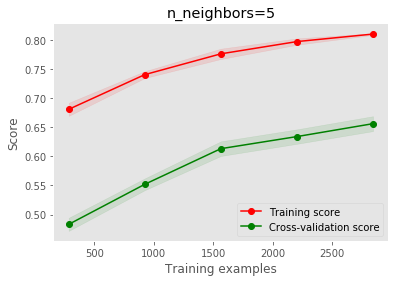

In [ ]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    X_train, y_train, cv=5)

## Построение кривой валидации

In [ ]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

In [ ]:
n_range = np.array(range(5,55,5))
plot_validation_curve(KNeighborsClassifier(n_neighbors=5), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=5, scoring="accuracy")